In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import scipy as stats
from scipy.stats import skew, norm

In [2]:
df=pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
nulls=df['fixed acidity'].isnull()

In [8]:
df.loc[nulls,'fixed acidity']=df.groupby(['type','quality'])['fixed acidity'].transform('mean')

In [9]:
nulls=df['volatile acidity'].isnull()

In [10]:
df.loc[nulls,'volatile acidity']=df.groupby(['type','quality'])['volatile acidity'].transform('mean')

In [11]:
nulls=df['citric acid'].isnull()

In [12]:
df.loc[nulls,'citric acid']=df.groupby(['type','quality'])['citric acid'].transform('mean')

In [13]:
nulls=df['residual sugar'].isnull()

In [14]:
df.loc[nulls,'residual sugar']=df.groupby(['type','quality'])['residual sugar'].transform('mean')

In [15]:
nulls=df['chlorides'].isnull()

In [16]:
df.loc[nulls,'chlorides']=df.groupby(['type','quality'])['chlorides'].transform('mean')

In [17]:
nulls=df['pH'].isnull()

In [18]:
df.loc[nulls,'pH']=df.groupby(['type','quality'])['pH'].transform('mean')

In [19]:
nulls=df['sulphates'].isnull()

In [20]:
df.loc[nulls,'sulphates']=df.groupby(['type','quality'])['sulphates'].transform('mean')

In [21]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
count=0
for i in df.columns:
    if df[i].dtype==float:
        count+=1
        
print(count)

11


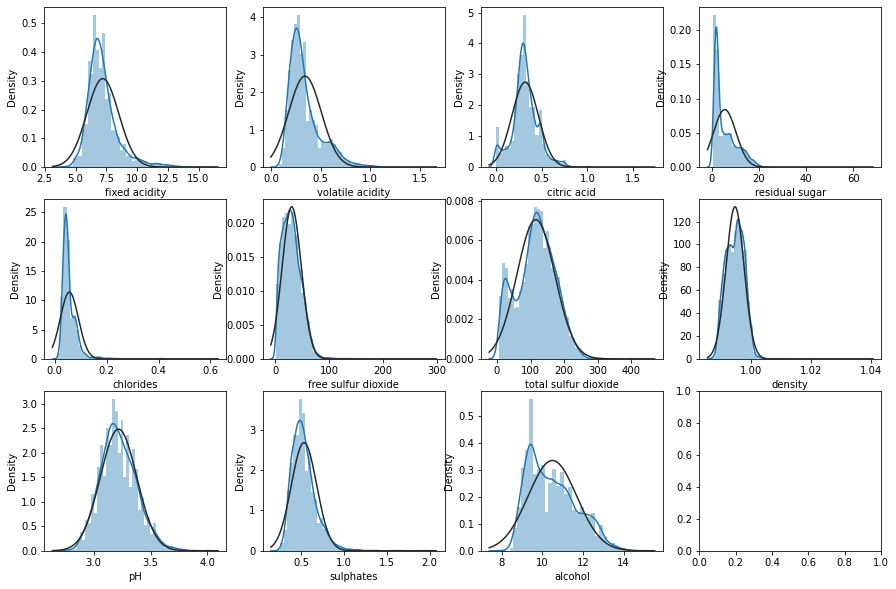

In [23]:
import seaborn as sns
fig , ax = plt.subplots(ncols=4, nrows=3,figsize=(15,10))
index=0
ax=ax.flatten()
for i in df.columns:
    if df[i].dtype==float:
        sns.distplot(df[i],fit=norm,ax=ax[index])
        index=index+1


In [24]:
for i in df.columns:
    if df[i].dtype==float:
        print(i," : ",abs(skew(df[i])))

fixed acidity  :  1.7233571926858164
volatile acidity  :  1.496259584065157
citric acid  :  0.47303399060199186
residual sugar  :  1.4348028002825748
chlorides  :  5.399493631716061
free sulfur dioxide  :  1.219784372282318
total sulfur dioxide  :  0.001177206365785478
density  :  0.5034854532378842
pH  :  0.3871428046359433
sulphates  :  1.7978397595621383
alcohol  :  0.5655871101918292


In [25]:
cols=['free sulfur dioxide','chlorides','density','sulphates','alcohol','fixed acidity','residual sugar','volatile acidity']

In [26]:
for i in cols:
    df[i]=np.log1p(df[i])

In [27]:
for i in df.columns:
    if df[i].dtype==float:
        print(i," : ",abs(skew(df[i])))

fixed acidity  :  0.9765257042302891
volatile acidity  :  1.127956713142808
citric acid  :  0.47303399060199186
residual sugar  :  0.4139970734187663
chlorides  :  4.484245750257051
free sulfur dioxide  :  0.7212671468400214
total sulfur dioxide  :  0.001177206365785478
density  :  0.4850506192531162
pH  :  0.3871428046359433
sulphates  :  1.0989892596484616
alcohol  :  0.39712947116413116


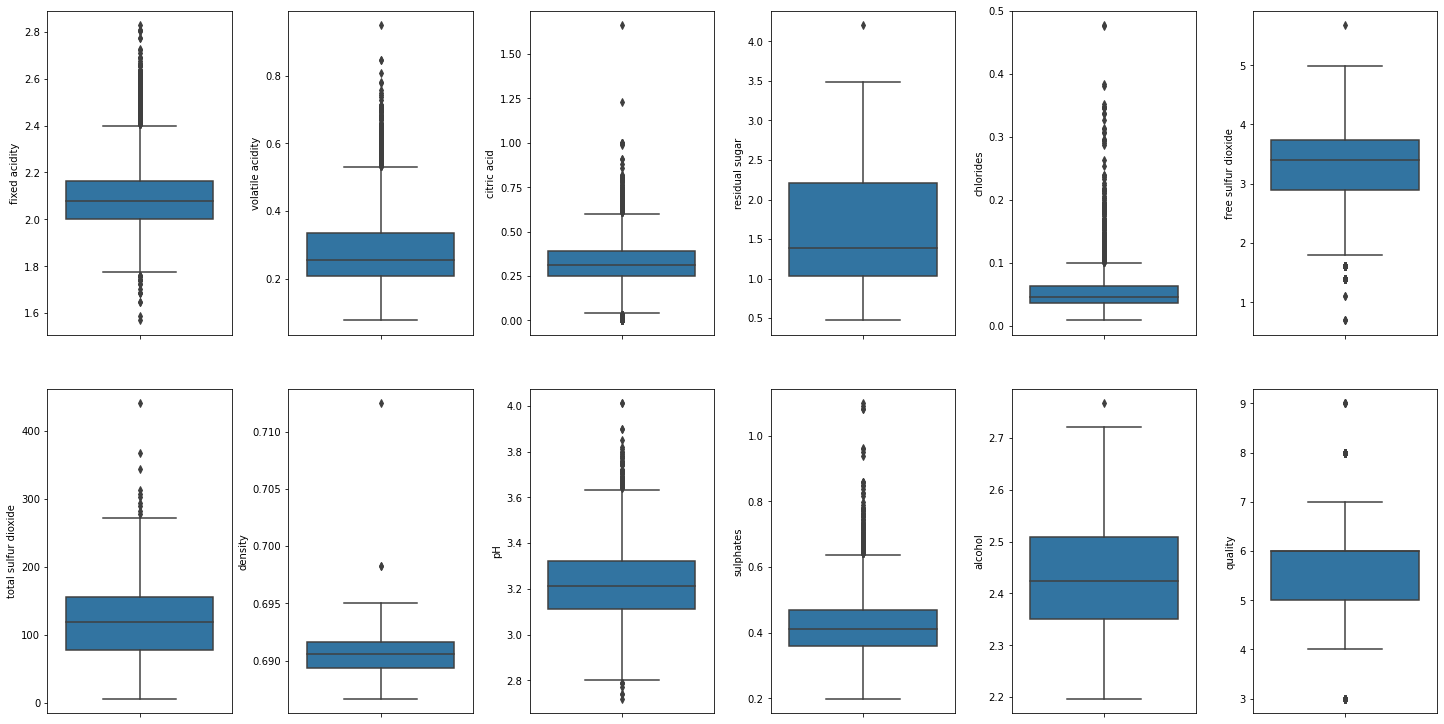

In [28]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

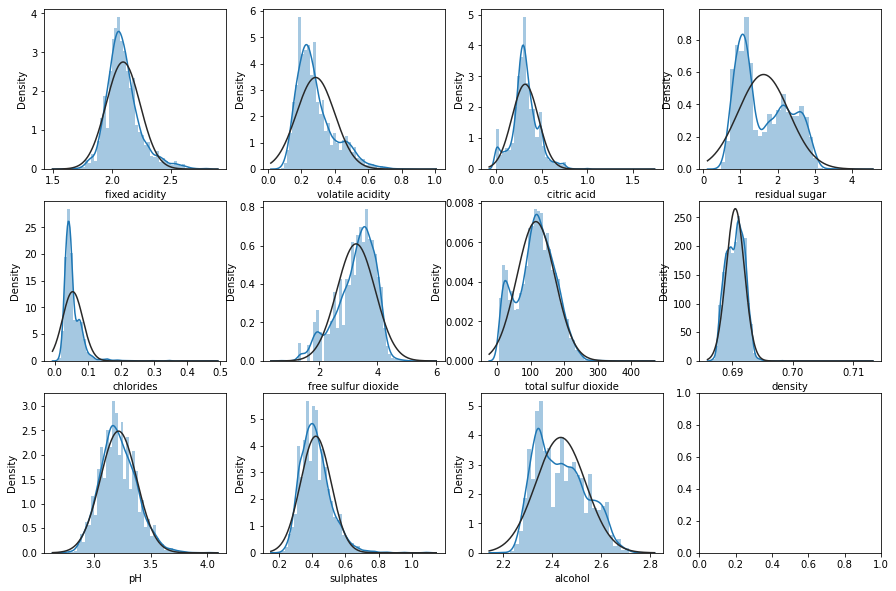

In [29]:
import seaborn as sns
fig , ax = plt.subplots(ncols=4, nrows=3,figsize=(15,10))
index=0
ax=ax.flatten()
for i in df.columns:
    if df[i].dtype==float:
        sns.distplot(df[i],fit=norm,ax=ax[index])
        index=index+1


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [32]:
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [33]:
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [34]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:>

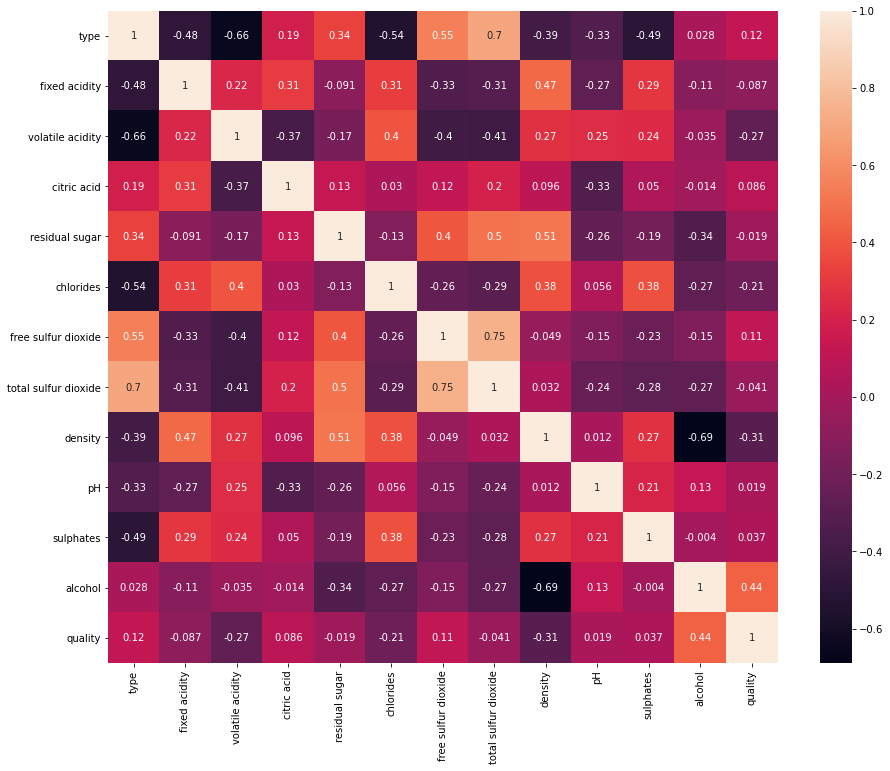

In [35]:
corr=df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)

In [36]:
df.drop('residual sugar',axis=1,inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

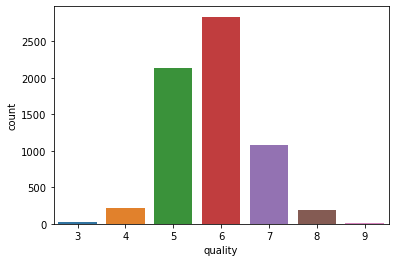

In [37]:
sns.countplot(df['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

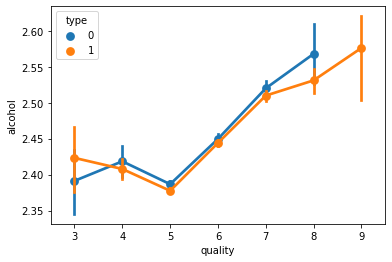

In [38]:
sns.pointplot(df['quality'].sort_values(ascending=True),df['alcohol'],hue=df['type'])

<AxesSubplot:xlabel='quality', ylabel='density'>

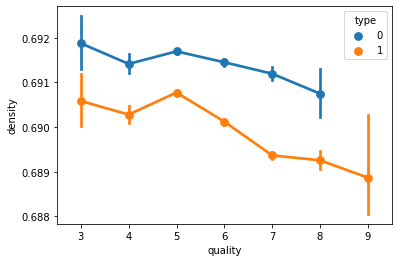

In [39]:
sns.pointplot(df['quality'].sort_values(ascending=True),df['density'],hue=df['type'])

In [58]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [65]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [66]:
from sklearn.model_selection import train_test_split , cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X, y ,random_state=42,test_size=0.25)

In [67]:
len(y_train)

14889

In [68]:
from sklearn.linear_model import LinearRegression
def classify(model):
    lr=model()
    lr.fit(x_train,y_train)
    cv_score=cross_val_score(lr,x_test,y_test, scoring='neg_mean_squared_error', cv=5)
    print("cv score : ", abs(cv_score.mean()))
    print("accuracy : ",lr.score(x_test,y_test))

In [69]:
from sklearn.tree import DecisionTreeRegressor
classify(DecisionTreeRegressor)

cv score :  0.848480289445473
accuracy :  0.8715471961774954


In [70]:
classify(LinearRegression)

cv score :  1.8660913391573106
accuracy :  0.5305500087611712


In [71]:
from sklearn.ensemble import ExtraTreesRegressor
classify(ExtraTreesRegressor)

cv score :  0.31569056392733
accuracy :  0.9620993770453
